# inisiasi library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Import data ke google collab

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Semester 6/Data Mining/tugas/Netflix TV Shows and Movies.csv')
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


 # Exploratory Data Analysis

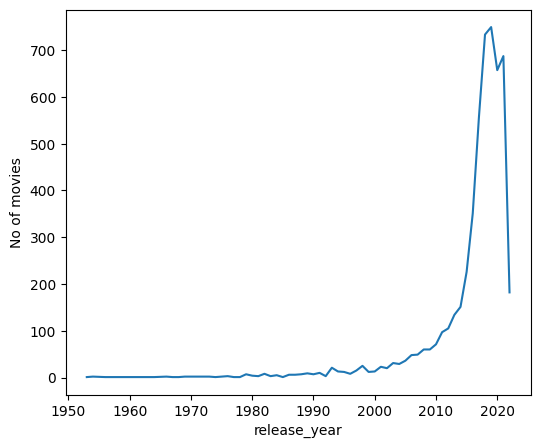

In [ ]:
plt.figure(figsize=(6,5))
df.groupby(["release_year"])["title"].count().plot()
plt.ylabel("No of movies")
plt.show()

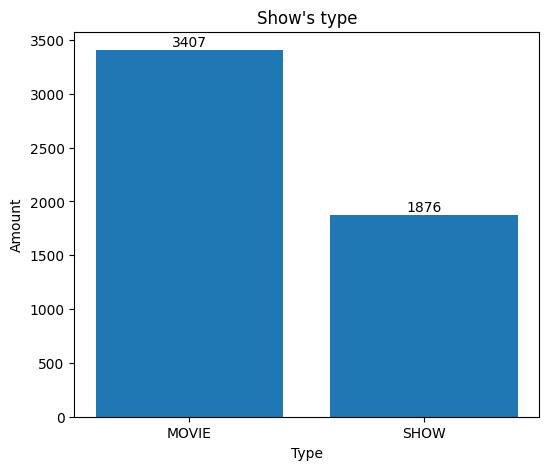

In [ ]:
import matplotlib.pyplot as plt

film_type = df['type'].value_counts()

plt.figure(figsize=(6,5))
bars = plt.bar(film_type.index, film_type.values)

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height + 5, int(height), ha='center', va='bottom')

plt.xlabel('Type')
plt.ylabel('Amount')
plt.title("Show's type")
plt.show()

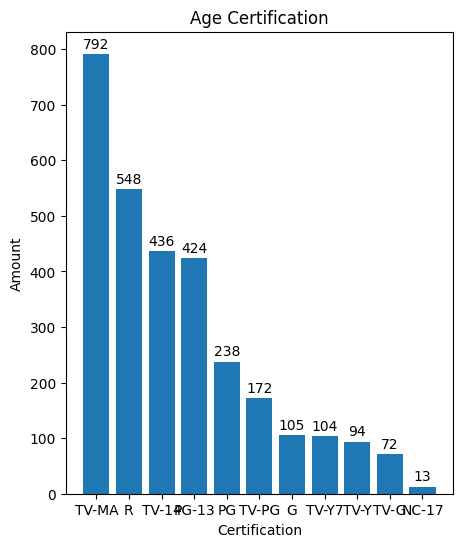

In [ ]:
age_certification = df['age_certification'].value_counts()

plt.figure(figsize=(5,6))
bars = plt.bar(age_certification.index, age_certification.values)

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height + 5, int(height), ha='center', va='bottom')

plt.xlabel('Certification')
plt.ylabel('Amount')
plt.title("Age Certification")
plt.show()

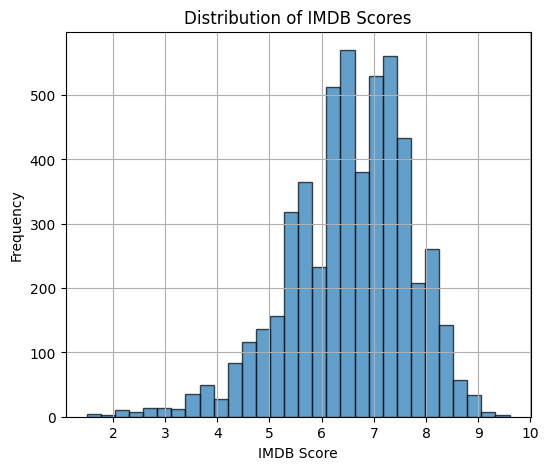

In [ ]:
plt.figure(figsize=(6, 5))
plt.hist(df['imdb_score'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Data Pre-processing

## Data Cleaning


In [ ]:
df.isna().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


Terdapat 3 kolom yang memiliki null value yaitu description, age_certification, dan imdb_votes. melihat isi dari kolom deskripsi yang merupakan data teks dan masuk ke ranah NLP maka null value dari kolom ini tidak akan kami gunakan pada project ini. Sementara untuk 2 kolom lain nya yang merupakan data kategorikal yang bisa di encode menjadi angka maka akan kami berlakukan data cleaning

In [ ]:
selected_rows = df.iloc[9:15]
selected_rows

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
9,9,tm67378,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,tt0060862,7.3,16168.0
10,10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,tt0054953,7.5,50150.0
11,11,tm69778,Lupin the Third: The Castle of Cagliostro,MOVIE,After a successful robbery leaves famed thief ...,1979,PG,100,tt0079833,7.6,30277.0
12,12,tm69997,Richard Pryor: Live in Concert,MOVIE,"Richard Pryor delivers monologues on race, sex...",1979,R,78,tt0079807,8.1,5141.0
13,13,tm96649,The Long Riders,MOVIE,"The origins, exploits and the ultimate fate of...",1980,R,99,tt0081071,6.9,11329.0
14,14,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,tt0047673,7.5,42373.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_data = df.dropna(subset=['age_certification'])
test_data = df[df['age_certification'].isnull()]

# Encode fitur kategorikal
train_data_encoded = pd.get_dummies(train_data, columns=['type'])
test_data_encoded = pd.get_dummies(test_data, columns=['type'])

# Pisahkan fitur dan label
X_train = train_data_encoded[['runtime', 'type_MOVIE', 'type_SHOW']]
y_train = train_data_encoded['age_certification']
X_test = test_data_encoded[['runtime', 'type_MOVIE', 'type_SHOW']]

# Melatih model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediksi nilai yang hilang
df.loc[df['age_certification'].isnull(), 'age_certification'] = model.predict(X_test)

In [ ]:
df.imdb_votes.fillna(value=df.imdb_votes.mean(), inplace= True)

In [ ]:
df.isna().sum()

index                0
id                   0
title                0
type                 0
description          5
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           0
dtype: int64

In [ ]:
selected_rows = df.iloc[9:15]
selected_rows

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
9,9,tm67378,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,tt0060862,7.3,16168.0
10,10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,R,158,tt0054953,7.5,50150.0
11,11,tm69778,Lupin the Third: The Castle of Cagliostro,MOVIE,After a successful robbery leaves famed thief ...,1979,PG,100,tt0079833,7.6,30277.0
12,12,tm69997,Richard Pryor: Live in Concert,MOVIE,"Richard Pryor delivers monologues on race, sex...",1979,R,78,tt0079807,8.1,5141.0
13,13,tm96649,The Long Riders,MOVIE,"The origins, exploits and the ultimate fate of...",1980,R,99,tt0081071,6.9,11329.0
14,14,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,R,115,tt0047673,7.5,42373.0


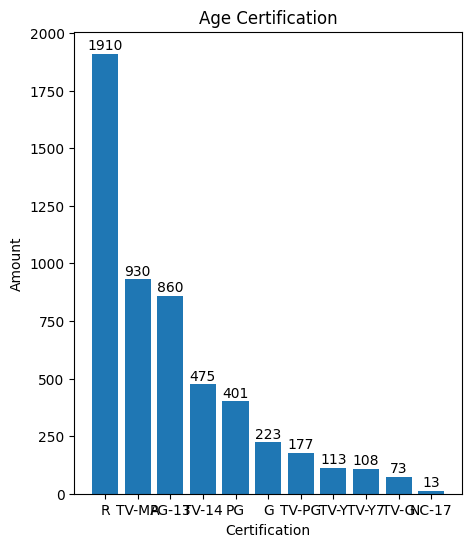

In [ ]:
age_certification = df['age_certification'].value_counts()

plt.figure(figsize=(5,6))
bars = plt.bar(age_certification.index, age_certification.values)

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height + 5, int(height), ha='center', va='bottom')

plt.xlabel('Certification')
plt.ylabel('Amount')
plt.title("Age Certification")
plt.show()

In [ ]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [ ]:
df.drop(['title','index','id','description','imdb_id'],axis=1,inplace=True)

In [ ]:
df['age_certification'].value_counts()

age_certification
R        1910
TV-MA     930
PG-13     860
TV-14     475
PG        401
G         223
TV-PG     177
TV-Y      113
TV-Y7     108
TV-G       73
NC-17      13
Name: count, dtype: int64

In [ ]:
df.head()

,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,MOVIE,1976,R,113,8.3,795222.0
1,MOVIE,1975,PG,91,8.2,530877.0
2,MOVIE,1979,R,94,8.0,392419.0
3,MOVIE,1973,R,133,8.1,391942.0
4,SHOW,1969,TV-14,30,8.8,72895.0


## Label Encoder pada colom 'type' dan 'age_certification'

In [ ]:
print(df['type'].unique())
print(df['age_certification'].unique())
labelencoder = LabelEncoder()
df['type'] = labelencoder.fit_transform(df['type'])
df['age_certification'] = labelencoder.fit_transform(df['age_certification'])

['MOVIE' 'SHOW']
['R' 'PG' 'TV-14' 'G' 'PG-13' 'TV-MA' 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7'
 'NC-17']


In [ ]:
df.head()

,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,0,1976,4,113,8.3,795222.0
1,0,1975,2,91,8.2,530877.0
2,0,1979,4,94,8.0,392419.0
3,0,1973,4,133,8.1,391942.0
4,1,1969,5,30,8.8,72895.0


In [ ]:
min_max_scaler = MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df
df = scaleColumns(df,['type','release_year','age_certification','runtime','imdb_votes'])
df.head()

,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,0.0,0.333333,0.4,0.480851,8.3,0.350581
1,0.0,0.318841,0.2,0.387234,8.2,0.234041
2,0.0,0.376812,0.4,0.400000,8.0,0.173000
3,0.0,0.289855,0.4,0.565957,8.1,0.172790
4,1.0,0.231884,0.5,0.127660,8.8,0.032134


# Data Mining Tasks

## Original data

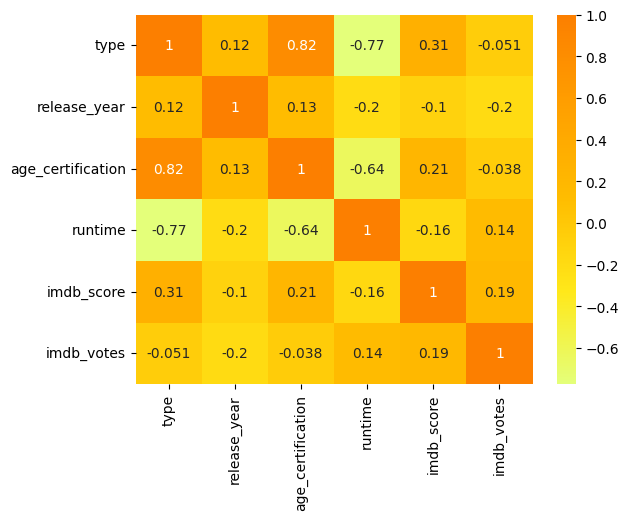

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

X = df[['type','release_year','age_certification','runtime','imdb_votes']]
y = df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

Data splitting

### Linier Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error(RMSE): {rmse}')

Mean Squared Error (MSE): 1.0787945989264685
Mean Absolute Error: 0.7980417635208655
Root Mean Squared Error(RMSE): 1.0386503737670671


### Random Forest Regresor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rfg.fit(X_train, y_train)

y_pred_rf = rfg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_fr = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Mean Absolute Error: {mae_fr}')
print(f'Root Mean Squared Error(RMSE): {rmse_rf}')

Mean Squared Error (MSE): 1.1276867549668872
Mean Absolute Error: 0.8031125827814568
Root Mean Squared Error(RMSE): 1.061925964917935


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


### Xgboost Regressor

In [ ]:
!pip install xgboost

import xgboost
print(xgboost.__version__)

from xgboost import XGBRegressor

xgbr = XGBRegressor(n_estimators=10, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbr.fit(X_train,y_train)

y_pred_xgbr = xgbr.predict(X_test)

mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
mae_xgbr = mean_absolute_error(y_test, y_pred_xgbr)
rmse_xgbr = np.sqrt(mse_xgbr)
print(f'Mean Squared Error (MSE): {mse_xgbr}')
print(f'Mean Absolute Error: {mae_xgbr}')
print(f'Root Mean Squared Error(RMSE): {rmse_xgbr}')

2.0.3
Mean Squared Error (MSE): 1.0349725179360478
Mean Absolute Error: 0.7850857025514602
Root Mean Squared Error(RMSE): 1.0173359906815682


### Support Vector Regression

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')

svr.fit(X_train,y_train)

y_pred_svr = svr.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error(MAE) {mae_svr}')
print(f'Root Mean Squared Error(RMSE): {rmse_svr}')

Mean Squared Error (MSE): 1.0787945989264685
Mean Absolute Error(MAE) 0.795129975821081
Root Mean Squared Error(RMSE): 1.046246884393033


### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X_train)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y_train)

X_test_poly = pr.transform(X_test)
y_pred_poly = lr_2.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse_poly}')
print(f'Mean Absolute Error (MAE): {mae_poly}')
print(f'Root Mean Squared Error (RMSE): {rmse_poly}')

Mean Squared Error (MSE): 2.267382875249364
Mean Absolute Error (MAE): 0.8154698926543106
Root Mean Squared Error (RMSE): 1.0386503737670671


## Resampled data

In [ ]:
!pip install ImbalancedLearningRegression

import ImbalancedLearningRegression as iblr

df_resampled = iblr.ro(
    data = df,
    y = 'imdb_score'
)
df_resampled.shape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 2.4 MB/s eta 0:00:00


r_index: 100%|##########| 2130/2130 [00:01<00:00, 1315.23it/s]


(7413, 6)

In [ ]:
df.shape

(5283, 6)

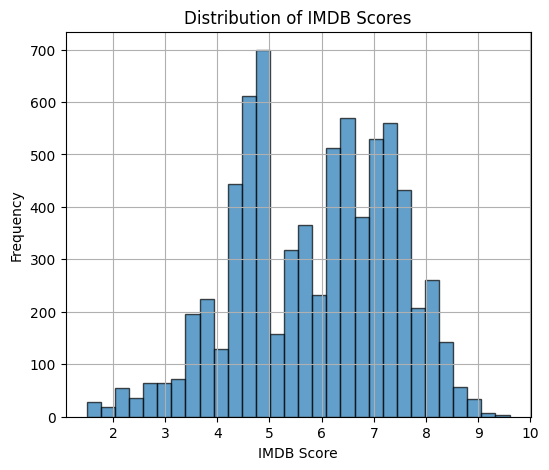

In [ ]:
plt.figure(figsize=(6, 5))
plt.hist(df_resampled['imdb_score'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Data splitting

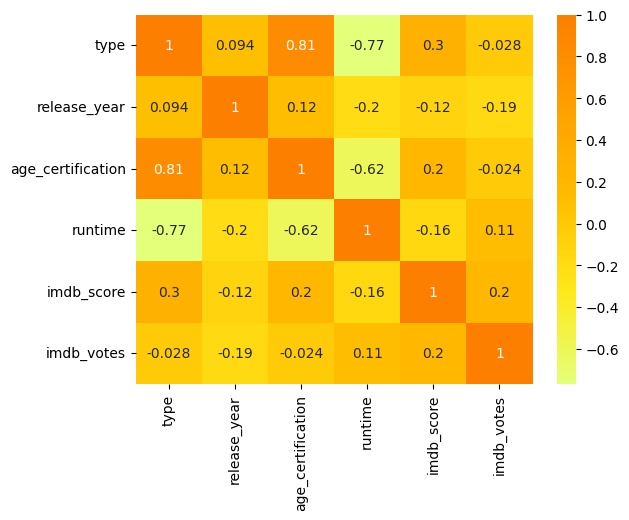

In [ ]:
corr = df_resampled.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

X_res = df_resampled[['type','release_year','age_certification','runtime','imdb_votes']]
y_res = df_resampled['imdb_score']

Xres_train, Xres_test, yres_train, yres_test = train_test_split(X_res, y_res, test_size=0.2, random_state=26)

### Linier Regression

In [ ]:
lr = LinearRegression()
lr.fit(Xres_train, yres_train)

yres_pred_lr = lr.predict(Xres_test)
mse_lr = mean_squared_error(yres_test,yres_pred_lr)
rmse_lr = np.sqrt(mse)
mae_lr = mean_absolute_error(yres_test,yres_pred_lr)

# Menampilkan hasil metrik evaluasi
print(f'Mean Squared Error (MSE): {mse_lr}')
print(f'Mean Absolute Error: {mae_lr}')
print(f'Root Mean Squared Error(RMSE): {rmse_lr}')

Mean Squared Error (MSE): 1.9187539918043535
Mean Absolute Error: 1.131110453993223
Root Mean Squared Error(RMSE): 1.0386503737670671


### Random Forest Regresor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rfg.fit(Xres_train,yres_train)

yres_pred_rf = rfg.predict(Xres_test)

mse_rf = mean_squared_error(yres_test, yres_pred_rf)
mae_fr = mean_absolute_error(yres_test, yres_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Mean Absolute Error: {mae_fr}')
print(f'Root Mean Squared Error(RMSE): {rmse_rf}')

Mean Squared Error (MSE): 0.7097453337230176
Mean Absolute Error: 0.5448087796143408
Root Mean Squared Error(RMSE): 0.84246384713115


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


### Xgboost Regressor

In [ ]:
xgbr = XGBRegressor(n_estimators=10, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbr.fit(Xres_train,yres_train)

yres_pred_xgbr = xgbr.predict(Xres_test)

mse_xgbr = mean_squared_error(yres_test, yres_pred_xgbr)
mae_xgbr = mean_absolute_error(yres_test, yres_pred_xgbr)
rmse_xgbr = np.sqrt(mse_xgbr)
print(f'Mean Squared Error (MSE): {mse_xgbr}')
print(f'Mean Absolute Error: {mae_xgbr}')
print(f'Root Mean Squared Error(RMSE): {rmse_xgbr}')

Mean Squared Error (MSE): 1.5744122646866858
Mean Absolute Error: 1.0450734642656445
Root Mean Squared Error(RMSE): 1.2547558585982717


### Support Vector Regression

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')

svr.fit(Xres_train,yres_train)

yres_pred_svr = svr.predict(Xres_test)

mse_svr = mean_squared_error(yres_test, yres_pred_svr)
mae_svr = mean_absolute_error(yres_test, yres_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error(MAE) {mae_svr}')
print(f'Root Mean Squared Error(RMSE): {rmse_svr}')

Mean Squared Error (MSE): 1.0787945989264685
Mean Absolute Error(MAE) 1.1103226548156202
Root Mean Squared Error(RMSE): 1.3956635059823184


### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree = 4)
Xres_poly = pr.fit_transform(Xres_train)
lr_2 = LinearRegression()
lr_2.fit(Xres_poly, yres_train)

Xres_test_poly = pr.transform(Xres_test)
yres_pred_poly = lr_2.predict(Xres_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse_poly}')
print(f'Mean Absolute Error (MAE): {mae_poly}')
print(f'Root Mean Squared Error (RMSE): {rmse_poly}')

Mean Squared Error (MSE): 2.267382875249364
Mean Absolute Error (MAE): 0.8154698926543106
Root Mean Squared Error (RMSE): 1.0386503737670671


# Seleksi fitur

## Original Data

### Chi square

#### Linear Regression

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

df_copy = df.copy()
target_categories = pd.cut(df_copy['imdb_score'], bins=10)
df_copy['imdb_score'] = target_categories
df_copy.head()

X_chi = df_copy.drop(['imdb_score'],axis=1)
y_chi = df_copy['imdb_score']

y_chi = labelencoder.fit_transform(y_chi)
X_train_chi2,X_test_chi2,y_train_chi2,y_test_chi2 = train_test_split(X_chi, y_chi, test_size=0.2, random_state=42)

# Inisialisasi list untuk menyimpan hasil
results_chi2 = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train_chi2.shape[1] + 1):
    # Menggunakan SelectKBest dengan chi2 untuk memilih k fitur terbaik
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X_train_chi2, y_train_chi2)
    selected_features = list(X_train_chi2.columns[selector.get_support()])

    # Latih model dengan fitur yang dipilih
    model.fit(X_train_chi2[selected_features], y_train_chi2)
    neg_mean_squared_error = model.score(X_test_chi2[selected_features], y_test_chi2)

    # Simpan hasil
    results_chi2.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_chi2:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

# Pilih fitur terbaik (misalnya 4 terbaik)
best_features_chi2 = []
for result in results_chi2:
    best_features_chi2.extend(result[1])
    if len(best_features_chi2) >= 4:
        best_features_chi2 = best_features_chi2[:4]
        break

# Latih model dengan fitur terbaik yang dipilih
model.fit(X_train_chi2[best_features_chi2], y_train_chi2)
y_pred_chi2 = model.predict(X_test_chi2[best_features_chi2])
mse_lr_chi2 = mean_squared_error(y_test_chi2, y_pred_chi2)
mae_lr_chi2 = mean_absolute_error(y_test_chi2,y_pred_chi2)
rmse_lr_chi2 = np.sqrt(mse_lr_chi2)
print(f'Mean Squared Error (MSE_chi2): {mse_lr_chi2}')
print(f'Mean Absolute Error: {mae_lr_chi2}')
print(f'Root Mean Squared Error(RMSE_chi2): {rmse_lr_chi2}')


1 features: ['type'] -> neg_mean_squared_error: 0.0967
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1322
3 features: ['type', 'age_certification', 'imdb_votes'] -> neg_mean_squared_error: 0.1313
4 features: ['type', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1390
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1427
Mean Squared Error (MSE_chi2): 2.0143706149895384
Mean Absolute Error: 1.1028837771690645
Root Mean Squared Error(RMSE_chi2): 1.4192852479292308


#### Random Forest Regressor

In [ ]:
# Inisialisasi list untuk menyimpan hasil
results_chi2_rfg = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train_chi2.shape[1] + 1):
    # Menggunakan SelectKBest dengan chi2 untuk memilih k fitur terbaik
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X_train_chi2, y_train_chi2)
    selected_features = list(X_train_chi2.columns[selector.get_support()])

    # Latih rfg dengan fitur yang dipilih
    rfg.fit(X_train_chi2[selected_features], y_train_chi2)
    neg_mean_squared_error = rfg.score(X_test_chi2[selected_features], y_test_chi2)

    # Simpan hasil
    results_chi2_rfg.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_chi2_rfg:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

# Pilih fitur terbaik (misalnya 4 terbaik)
best_features_chi2 = []
for result in results_chi2_rfg:
    best_features_chi2.extend(result[1])
    if len(best_features_chi2) >= 4:
        best_features_chi2 = best_features_chi2[:4]
        break

# Latih rfg dengan fitur terbaik yang dipilih
rfg.fit(X_train_chi2[best_features_chi2], y_train_chi2)
rfg_y_pred_chi2 = rfg.predict(X_test_chi2[best_features_chi2])
mse_rfg_chi2 = mean_squared_error(y_test_chi2, rfg_y_pred_chi2)
mae_rfg_chi2 = mean_absolute_error(y_test_chi2,rfg_y_pred_chi2)
rmse_rfg_chi2 = np.sqrt(mse_rfg_chi2)
print(f'Mean Squared Error (MSE_chi2): {mse_rfg_chi2}')
print(f'Mean Absolute Error: {mae_rfg_chi2}')
print(f'Root Mean Squared Error(RMSE_chi2): {rmse_rfg_chi2}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


1 features: ['type'] -> neg_mean_squared_error: 0.0966
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: -0.2003
3 features: ['type', 'age_certification', 'imdb_votes'] -> neg_mean_squared_error: -0.1231
4 features: ['type', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: -0.0450
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.0805
Mean Squared Error (MSE_chi2): 2.7867522712124435
Mean Absolute Error: 1.268802254194875
Root Mean Squared Error(RMSE_chi2): 1.6693568435815165


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


#### Xgboost Regressor

In [ ]:
# Inisialisasi list untuk menyimpan hasil
results_chi2_xgbr = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train_chi2.shape[1] + 1):
    # Menggunakan SelectKBest dengan chi2 untuk memilih k fitur terbaik
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X_train_chi2, y_train_chi2)
    selected_features = list(X_train_chi2.columns[selector.get_support()])

    # Latih xgbr dengan fitur yang dipilih
    xgbr.fit(X_train_chi2[selected_features], y_train_chi2)
    neg_mean_squared_error = xgbr.score(X_test_chi2[selected_features], y_test_chi2)

    # Simpan hasil
    results_chi2_xgbr.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_chi2_xgbr:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

# Pilih fitur terbaik (misalnya 4 terbaik)
best_features_chi2 = []
for result in results_chi2_xgbr:
    for feature in result[1]:
        if feature not in best_features_chi2:
            best_features_chi2.append(feature)
    if len(best_features_chi2) >= 4:
        best_features_chi2 = best_features_chi2[:4]
        break

# Latih xgbr dengan fitur terbaik yang dipilih
xgbr.fit(X_train_chi2[best_features_chi2], y_train_chi2)
xgbr_y_pred_chi2 = xgbr.predict(X_test_chi2[best_features_chi2])
mse_xgbr_chi2 = mean_squared_error(y_test_chi2, xgbr_y_pred_chi2)
mae_xgbr_chi2 = mean_absolute_error(y_test_chi2,xgbr_y_pred_chi2)
rmse_xgbr_chi2 = np.sqrt(mse_xgbr_chi2)
print(f'Mean Squared Error (MSE_chi2): {mse_xgbr_chi2}')
print(f'Mean Absolute Error: {mae_xgbr_chi2}')
print(f'Root Mean Squared Error(RMSE_chi2): {rmse_xgbr_chi2}')

1 features: ['type'] -> neg_mean_squared_error: 0.0813
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1029
3 features: ['type', 'age_certification', 'imdb_votes'] -> neg_mean_squared_error: 0.1303
4 features: ['type', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1751
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1877
Mean Squared Error (MSE_chi2): 1.9097276556910268
Mean Absolute Error: 1.0553874387533573
Root Mean Squared Error(RMSE_chi2): 1.3819289618830002


#### Support Vector Regressor

In [ ]:
# Inisialisasi list untuk menyimpan hasil
results_chi2_svr = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train_chi2.shape[1] + 1):
    # Menggunakan SelectKBest dengan chi2 untuk memilih k fitur terbaik
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X_train_chi2, y_train_chi2)
    selected_features = list(X_train_chi2.columns[selector.get_support()])

    # Latih svr dengan fitur yang dipilih
    svr.fit(X_train_chi2[selected_features], y_train_chi2)
    neg_mean_squared_error = svr.score(X_test_chi2[selected_features], y_test_chi2)

    # Simpan hasil
    results_chi2_svr.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_chi2_svr:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

# Pilih fitur terbaik (misalnya 4 terbaik)
best_features_chi2 = []
for result in results_chi2_svr:
    best_features_chi2.extend(result[1])
    if len(best_features_chi2) >= 4:
        best_features_chi2 = best_features_chi2[:4]
        break

# Latih svr dengan fitur terbaik yang dipilih
svr.fit(X_train_chi2[best_features_chi2], y_train_chi2)
svr_y_pred_chi2 = svr.predict(X_test_chi2[best_features_chi2])
mse_svr_chi2 = mean_squared_error(y_test_chi2, svr_y_pred_chi2)
mae_svr_chi2 = mean_absolute_error(y_test_chi2,svr_y_pred_chi2)
rmse_svr_chi2 = np.sqrt(mse_svr_chi2)
print(f'Mean Squared Error (MSE_chi2): {mse_svr_chi2}')
print(f'Mean Absolute Error: {mae_svr_chi2}')
print(f'Root Mean Squared Error(RMSE_chi2): {rmse_svr_chi2}')

1 features: ['type'] -> neg_mean_squared_error: -0.0034
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1300
3 features: ['type', 'age_certification', 'imdb_votes'] -> neg_mean_squared_error: 0.1107
4 features: ['type', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1196
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1272
Mean Squared Error (MSE_chi2): 2.0195030458076033
Mean Absolute Error: 1.1023666014240328
Root Mean Squared Error(RMSE_chi2): 1.4210922017264056


### SFS forward

#### linear Regression

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

results = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    sfs = SFS(model,
              k_features=k,
              forward=True,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sfs = sfs.fit(X_train, y_train)
    selected_features = list(sfs.k_feature_names_)

    # Latih model dengan fitur yang dipilih
    model.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = model.score(X_test[selected_features], y_test)

    # Simpan hasil
    results.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

model.fit(X_train[best_features], y_train)
y_pred_sfs = model.predict(X_test[best_features])
mse_lr_sfs = mean_squared_error(y_test, y_pred_sfs)
mae_lr_sfs = mean_absolute_error(y_test,y_pred_sfs)
rmse_lr_sfs = np.sqrt(mse_lr_sfs)
print(f'Mean Squared Error (MSE_sfs): {mse_lr_sfs}')
print(f'Mean Absolute Error: {mae_lr_sfs}')
print(f'Root Mean Squared Error(RMSE_sfs): {rmse_lr_sfs}')

1 features: ['type'] -> neg_mean_squared_error: 0.1161
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1605
3 features: ['type', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1550
4 features: ['type', 'release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1640
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1664
Mean Squared Error (MSE_sfs): 1.0881973105342873
Mean Absolute Error: 0.8013062242930201
Root Mean Squared Error(RMSE_sfs): 1.0431669619645205


#### Random Forest Regresor

In [ ]:
results_rfg = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    sfs = SFS(rfg,
              k_features=k,
              forward=True,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sfs = sfs.fit(X_train, y_train)
    selected_features = list(sfs.k_feature_names_)

    # Latih rfg dengan fitur yang dipilih
    rfg.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = rfg.score(X_test[selected_features], y_test)

    # Simpan hasil
    results_rfg.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_rfg:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_rfg:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

rfg.fit(X_train[best_features], y_train)
rfg_y_pred_sfs = rfg.predict(X_test[best_features])
mse_rfg_sfs = mean_squared_error(y_test, rfg_y_pred_sfs)
mae_rfg_sfs = mean_absolute_error(y_test,rfg_y_pred_sfs)
rmse_rfg_sfs = np.sqrt(mse_rfg_sfs)
print('hasil metriks')
print(f'Mean Squared Error (MSE_sfs): {mse_rfg_sfs}')
print(f'Mean Absolute Error: {mae_rfg_sfs}')
print(f'Root Mean Squared Error(RMSE_sfs): {rmse_rfg_sfs}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

1 features: ['age_certification'] -> neg_mean_squared_error: 0.1281
2 features: ['type', 'age_certification'] -> neg_mean_squared_error: 0.1281
3 features: ['type', 'release_year', 'age_certification'] -> neg_mean_squared_error: 0.0446
4 features: ['type', 'release_year', 'age_certification', 'imdb_votes'] -> neg_mean_squared_error: -0.0211
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1287
hasil metriks
Mean Squared Error (MSE_sfs): 1.128393136118757
Mean Absolute Error: 0.8173765447552939
Root Mean Squared Error(RMSE_sfs): 1.0622585071999926


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


#### Xgboost Regressor

In [ ]:
results_xgbr = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    sfs = SFS(xgbr,
              k_features=k,
              forward=True,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sfs = sfs.fit(X_train, y_train)
    selected_features = list(sfs.k_feature_names_)

    # Latih xgbr dengan fitur yang dipilih
    xgbr.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = xgbr.score(X_test[selected_features], y_test)

    # Simpan hasil
    results_xgbr.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_xgbr:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_xgbr:
    for feature in result[1]:
        if feature not in best_features:
            best_features.append(feature)
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

xgbr.fit(X_train[best_features], y_train)
xgbr_y_pred_sfs = xgbr.predict(X_test[best_features])
mse_xgbr_sfs = mean_squared_error(y_test, xgbr_y_pred_sfs)
mae_xgbr_sfs = mean_absolute_error(y_test,xgbr_y_pred_sfs)
rmse_xgbr_sfs = np.sqrt(mse_xgbr_sfs)
print('hasil metriks')
print(f'Mean Squared Error (MSE_sfs): {mse_xgbr_sfs}')
print(f'Mean Absolute Error: {mae_xgbr_sfs}')
print(f'Root Mean Squared Error(RMSE_sfs): {rmse_xgbr_sfs}')

1 features: ['age_certification'] -> neg_mean_squared_error: 0.1072
2 features: ['age_certification', 'imdb_votes'] -> neg_mean_squared_error: 0.1194
3 features: ['age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1738
4 features: ['release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.2010
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.2003
hasil metriks
Mean Squared Error (MSE_sfs): 1.043767878923711
Mean Absolute Error: 0.7868442354048888
Root Mean Squared Error(RMSE_sfs): 1.0216495871499733


#### Suport Vector Regressor

In [ ]:
results_svr = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    sfs = SFS(svr,
              k_features=k,
              forward=True,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sfs = sfs.fit(X_train, y_train)
    selected_features = list(sfs.k_feature_names_)

    # Latih svr dengan fitur yang dipilih
    svr.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = svr.score(X_test[selected_features], y_test)

    # Simpan hasil
    results_svr.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_svr:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_svr:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

svr.fit(X_train[best_features], y_train)
y_pred_sfs = svr.predict(X_test[best_features])
mse_svr_sfs = mean_squared_error(y_test, y_pred_sfs)
mae_svr_sfs = mean_absolute_error(y_test,y_pred_sfs)
rmse_svr_sfs = np.sqrt(mse_svr_sfs)
print(f'Mean Squared Error (MSE_sfs): {mse_svr_sfs}')
print(f'Mean Absolute Error: {mae_svr_sfs}')
print(f'Root Mean Squared Error(RMSE_sfs): {rmse_svr_sfs}')

1 features: ['type'] -> neg_mean_squared_error: 0.1012
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1525
3 features: ['type', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1430
4 features: ['type', 'release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1529
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1542
Mean Squared Error (MSE_sfs): 1.0968290393278581
Mean Absolute Error: 0.7933504624354055
Root Mean Squared Error(RMSE_sfs): 1.0472960609721866


### SFS backward

#### linear Regression

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

results_sbs = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    sbs = SFS(model,
              k_features=k,
              forward=False,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sbs = sbs.fit(X_train, y_train)
    selected_features = list(sbs.k_feature_names_)

    # Latih model dengan fitur yang dipilih
    model.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = model.score(X_test[selected_features], y_test)

    # Simpan hasil
    results_sbs.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_sbs:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_sbs:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

model.fit(X_train[best_features], y_train)
y_pred_sbs = model.predict(X_test[best_features])
mse_lr_sbs = mean_squared_error(y_test, y_pred_sbs)
mae_lr_sbs = mean_absolute_error(y_test,y_pred_sbs)
rmse_lr_sbs = np.sqrt(mse_lr_sbs)
print(f'Mean Squared Error (MSE_sbs): {mse_lr_sbs}')
print(f'Mean Absolute Error: {mae_lr_sbs}')
print(f'Root Mean Squared Error(RMSE_sbs): {rmse_lr_sbs}')

1 features: ['type'] -> neg_mean_squared_error: 0.1161
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1605
3 features: ['type', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1550
4 features: ['type', 'release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1640
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1664
Mean Squared Error (MSE_sbs): 1.0881973105342873
Mean Absolute Error: 0.8013062242930201
Root Mean Squared Error(RMSE_sbs): 1.0431669619645205


#### Random Forest Regresor

In [ ]:
results_sbs_rfg = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    sbs = SFS(rfg,
              k_features=k,
              forward=False,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sbs = sbs.fit(X_train, y_train)
    selected_features = list(sbs.k_feature_names_)

    # Latih rfg dengan fitur yang dipilih
    rfg.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = rfg.score(X_test[selected_features], y_test)

    # Simpan hasil
    results_sbs_rfg.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_sbs_rfg:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_sbs_rfg:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

rfg.fit(X_train[best_features], y_train)
rfg_y_pred_sbs = rfg.predict(X_test[best_features])
mse_rfg_sbs = mean_squared_error(y_test, rfg_y_pred_sbs)
mae_rfg_sbs = mean_absolute_error(y_test,rfg_y_pred_sbs)
rmse_rfg_sbs = np.sqrt(mse_rfg_sbs)
print('hasil metriks')
print(f'Mean Squared Error (MSE_sbs): {mse_rfg_sbs}')
print(f'Mean Absolute Error: {mae_rfg_sbs}')
print(f'Root Mean Squared Error(RMSE_sbs): {rmse_rfg_sbs}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

1 features: ['runtime'] -> neg_mean_squared_error: 0.1016
2 features: ['runtime', 'imdb_votes'] -> neg_mean_squared_error: -0.0538
3 features: ['release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.0999
4 features: ['release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1372
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1287
hasil metriks
Mean Squared Error (MSE_sbs): 1.1849516608851045
Mean Absolute Error: 0.8294701986754967
Root Mean Squared Error(RMSE_sbs): 1.088554849736615


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


#### Xgboost Regressor

In [ ]:
results_xgbr_sbs = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    sbs = SFS(xgbr,
              k_features=k,
              forward=False,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sbs = sbs.fit(X_train, y_train)
    selected_features = list(sbs.k_feature_names_)

    # Latih xgbr dengan fitur yang dipilih
    xgbr.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = xgbr.score(X_test[selected_features], y_test)

    # Simpan hasil
    results_xgbr_sbs.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_xgbr_sbs:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_xgbr_sbs:
    for feature in result[1]:
        if feature not in best_features:
            best_features.append(feature)
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

xgbr.fit(X_train[best_features], y_train)
xgbr_y_pred_sbs = xgbr.predict(X_test[best_features])
mse_xgbr_sbs = mean_squared_error(y_test, xgbr_y_pred_sbs)
mae_xgbr_sbs = mean_absolute_error(y_test,xgbr_y_pred_sbs)
rmse_xgbr_sbs = np.sqrt(mse_xgbr_sbs)
print('hasil metriks')
print(f'Mean Squared Error (MSE_sbs): {mse_xgbr_sbs}')
print(f'Mean Absolute Error: {mae_xgbr_sbs}')
print(f'Root Mean Squared Error(RMSE_sbs): {rmse_xgbr_sbs}')

1 features: ['age_certification'] -> neg_mean_squared_error: 0.1072
2 features: ['age_certification', 'imdb_votes'] -> neg_mean_squared_error: 0.1194
3 features: ['age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1738
4 features: ['release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.2010
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.2003
hasil metriks
Mean Squared Error (MSE_sbs): 1.043767878923711
Mean Absolute Error: 0.7868442354048888
Root Mean Squared Error(RMSE_sbs): 1.0216495871499733


#### Suport Vector Regressor

In [ ]:
results_svr_sbs = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    sbs = SFS(svr,
              k_features=k,
              forward=False,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sbs = sbs.fit(X_train, y_train)
    selected_features = list(sbs.k_feature_names_)

    # Latih svr dengan fitur yang dipilih
    svr.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = svr.score(X_test[selected_features], y_test)

    # Simpan hasil
    results_svr_sbs.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_svr_sbs:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_svr_sbs:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

svr.fit(X_train[best_features], y_train)
svr_y_pred_sbs = svr.predict(X_test[best_features])
mse_svr_sbs = mean_squared_error(y_test, svr_y_pred_sbs)
mae_svr_sbs = mean_absolute_error(y_test,svr_y_pred_sbs)
rmse_svr_sbs = np.sqrt(mse_svr_sbs)
print(f'Mean Squared Error (MSE_sbs): {mse_svr_sbs}')
print(f'Mean Absolute Error: {mae_svr_sbs}')
print(f'Root Mean Squared Error(RMSE_sbs): {rmse_svr_sbs}')

1 features: ['type'] -> neg_mean_squared_error: 0.1012
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1525
3 features: ['type', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1430
4 features: ['type', 'release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1529
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1542
Mean Squared Error (MSE_sbs): 1.0968290393278581
Mean Absolute Error: 0.7933504624354055
Root Mean Squared Error(RMSE_sbs): 1.0472960609721866


### RFE

#### Linear Regression

In [ ]:
from sklearn.feature_selection import RFE

results_lr_rfe = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=model, n_features_to_select=k)
    rfe.fit(X_train, y_train)
    selected_features = list(X_train.columns[rfe.support_])

    # Latih model dengan fitur yang dipilih
    model.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = model.score(X_test[selected_features], y_test)

    # Simpan hasil
    results_lr_rfe.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_lr_rfe:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_lr_rfe:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

model.fit(X_train[best_features], y_train)
y_pred_rfe = model.predict(X_test[best_features])
mse_lr_rfe = mean_squared_error(y_test, y_pred_rfe)
mae_lr_rfe = mean_absolute_error(y_test,y_pred_rfe)
rmse_lr_rfe = np.sqrt(mse_lr_rfe)
print(f'Mean Squared Error (MSE_rfe): {mse_lr_rfe}')
print(f'Mean Absolute Error: {mae_lr_rfe}')
print(f'Root Mean Squared Error(RMSE_rfe): {rmse_lr_rfe}')


1 features: ['imdb_votes'] -> neg_mean_squared_error: 0.0361
2 features: ['runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.0956
3 features: ['type', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1550
4 features: ['type', 'release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1640
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1664
Mean Squared Error (MSE_rfe): 1.0935769067355159
Mean Absolute Error: 0.8053210444802682
Root Mean Squared Error(RMSE_rfe): 1.0457422754845076


#### Random Forest Regressor

In [ ]:
results_rfg_rfe = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=rfg, n_features_to_select=k)
    rfe.fit(X_train, y_train)
    selected_features = list(X_train.columns[rfe.support_])

    # Latih rfg dengan fitur yang dipilih
    rfg.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = rfg.score(X_test[selected_features], y_test)

    # Simpan hasil
    results_rfg_rfe.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_rfg_rfe:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_rfg_rfe:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

rfg.fit(X_train[best_features], y_train)
rfg_y_pred_rfe = rfg.predict(X_test[best_features])
mse_rfg_rfe = mean_squared_error(y_test, rfg_y_pred_rfe)
mae_rfg_rfe = mean_absolute_error(y_test,rfg_y_pred_rfe)
rmse_rfg_rfe = np.sqrt(mse_rfg_rfe)
print(f'Mean Squared Error (MSE_rfe): {mse_rfg_rfe}')
print(f'Mean Absolute Error: {mae_rfg_rfe}')
print(f'Root Mean Squared Error(RMSE_rfe): {rmse_rfg_rfe}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

1 features: ['imdb_votes'] -> neg_mean_squared_error: -0.4378
2 features: ['runtime', 'imdb_votes'] -> neg_mean_squared_error: -0.0538
3 features: ['release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.0999
4 features: ['release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1372
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1287
Mean Squared Error (MSE_rfe): 1.1905030011563125
Mean Absolute Error: 0.8289593188268686
Root Mean Squared Error(RMSE_rfe): 1.0911017373078977


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


#### Xgboost Regressor

In [ ]:
results_xgbr_rfe = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=xgbr, n_features_to_select=k)
    rfe.fit(X_train, y_train)
    selected_features = list(X_train.columns[rfe.support_])

    # Latih xgbr dengan fitur yang dipilih
    xgbr.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = xgbr.score(X_test[selected_features], y_test)

    # Simpan hasil
    results_xgbr_rfe.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_xgbr_rfe:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_xgbr_rfe:
    for feature in result[1]:
        if feature not in best_features:
            best_features.append(feature)
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

xgbr.fit(X_train[best_features], y_train)
xgbr_y_pred_rfe = xgbr.predict(X_test[best_features])
mse_xgbr_rfe = mean_squared_error(y_test, xgbr_y_pred_rfe)
mae_xgbr_rfe = mean_absolute_error(y_test,xgbr_y_pred_rfe)
rmse_xgbr_rfe = np.sqrt(mse_xgbr_rfe)
print(f'Mean Squared Error (MSE_rfe): {mse_xgbr_rfe}')
print(f'Mean Absolute Error: {mae_xgbr_rfe}')
print(f'Root Mean Squared Error(RMSE_rfe): {rmse_xgbr_rfe}')

1 features: ['type'] -> neg_mean_squared_error: 0.0960
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1111
3 features: ['type', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1689
4 features: ['type', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1855
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.2003
Mean Squared Error (MSE_rfe): 1.062776486559493
Mean Absolute Error: 0.7978312864096071
Root Mean Squared Error(RMSE_rfe): 1.0309105133616074


#### Support Vektor Regressor

In [ ]:
results_svr_rfe = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=svr, n_features_to_select=k)
    rfe.fit(X_train, y_train)
    selected_features = list(X_train.columns[rfe.support_])

    # Latih svr dengan fitur yang dipilih
    svr.fit(X_train[selected_features], y_train)
    neg_mean_squared_error = svr.score(X_test[selected_features], y_test)

    # Simpan hasil
    results_svr_rfe.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_svr_rfe:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_svr_rfe:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

svr.fit(X_train[best_features], y_train)
svr_y_pred_rfe = svr.predict(X_test[best_features])
mse_svr_rfe = mean_squared_error(y_test, svr_y_pred_rfe)
mae_svr_rfe = mean_absolute_error(y_test,svr_y_pred_rfe)
rmse_svr_rfe = np.sqrt(mse_svr_rfe)
print(f'Mean Squared Error (MSE_rfe): {mse_svr_rfe}')
print(f'Mean Absolute Error: {mae_svr_rfe}')
print(f'Root Mean Squared Error(RMSE_rfe): {rmse_svr_rfe}')

1 features: ['imdb_votes'] -> neg_mean_squared_error: 0.0229
2 features: ['runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.0876
3 features: ['type', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1430
4 features: ['type', 'release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1529
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1542
Mean Squared Error (MSE_rfe): 1.106583773798423
Mean Absolute Error: 0.801408397196531
Root Mean Squared Error(RMSE_rfe): 1.0519428567172378


## Resampled data

### Chi square

#### Linear Regression

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

df_resampled_copy = df_resampled.copy()
target_categories = pd.cut(df_resampled_copy['imdb_score'], bins=10)
df_resampled_copy['imdb_score'] = target_categories
df_resampled_copy.head()

X_chi2_resampled = df_resampled_copy.drop(['imdb_score'],axis=1)
y_chi2_resampled = df_resampled_copy['imdb_score']

y_chi2_resampled = labelencoder.fit_transform(y_chi2_resampled)
X_train_chi2_resampled,X_test_chi2_resampled,y_train_chi2_resampled,y_test_chi2_resampled = train_test_split(X_chi2_resampled, y_chi2_resampled, test_size=0.2, random_state=42)

# Inisialisasi list untuk menyimpan hasil
results_chi2_resampled = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train_chi2_resampled.shape[1] + 1):
    # Menggunakan SelectKBest dengan chi2 untuk memilih k fitur terbaik
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X_train_chi2_resampled, y_train_chi2_resampled)
    selected_features = list(X_train_chi2_resampled.columns[selector.get_support()])

    # Latih model dengan fitur yang dipilih
    model.fit(X_train_chi2_resampled[selected_features], y_train_chi2_resampled)
    neg_mean_squared_error = model.score(X_test_chi2_resampled[selected_features], y_test_chi2_resampled)

    # Simpan hasil
    results_chi2_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_chi2_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

# Pilih fitur terbaik (misalnya 4 terbaik)
best_features_chi2_resampled = []
for result in results_chi2_resampled:
    best_features_chi2_resampled.extend(result[1])
    if len(best_features_chi2_resampled) >= 4:
        best_features_chi2_resampled = best_features_chi2_resampled[:4]
        break

# Latih model dengan fitur terbaik yang dipilih
model.fit(X_train_chi2_resampled[best_features_chi2_resampled], y_train_chi2_resampled)
y_pred_chi2_resampled = model.predict(X_test_chi2_resampled[best_features_chi2_resampled])
mse_lr_chi2_resampled = mean_squared_error(y_test_chi2_resampled, y_pred_chi2_resampled)
mae_lr_chi2_resampled = mean_absolute_error(y_test_chi2_resampled,y_pred_chi2_resampled)
rmse_lr_chi2_resampled = np.sqrt(mse_lr_chi2_resampled)
print(f'Mean Squared Error (MSE_chi2_resampled): {mse_lr_chi2_resampled}')
print(f'Mean Absolute Error: {mae_lr_chi2_resampled}')
print(f'Root Mean Squared Error(RMSE_chi2_resampled): {rmse_lr_chi2_resampled}')


1 features: ['type'] -> neg_mean_squared_error: 0.0847
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1394
3 features: ['type', 'age_certification', 'imdb_votes'] -> neg_mean_squared_error: 0.1429
4 features: ['type', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1424
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1525
Mean Squared Error (MSE_chi2_resampled): 3.0889363451725322
Mean Absolute Error: 1.4416965259259575
Root Mean Squared Error(RMSE_chi2_resampled): 1.7575370110391793


#### Random Forest Regressor

In [ ]:
# Inisialisasi list untuk menyimpan hasil
results_chi2_resampled_rfg = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train_chi2_resampled.shape[1] + 1):
    # Menggunakan SelectKBest dengan chi2 untuk memilih k fitur terbaik
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X_train_chi2_resampled, y_train_chi2_resampled)
    selected_features = list(X_train_chi2_resampled.columns[selector.get_support()])

    # Latih rfg dengan fitur yang dipilih
    rfg.fit(X_train_chi2_resampled[selected_features], y_train_chi2_resampled)
    neg_mean_squared_error = rfg.score(X_test_chi2_resampled[selected_features], y_test_chi2_resampled)

    # Simpan hasil
    results_chi2_resampled_rfg.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_chi2_resampled_rfg:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

# Pilih fitur terbaik (misalnya 4 terbaik)
best_features_chi2_resampled = []
for result in results_chi2_resampled_rfg:
    best_features_chi2_resampled.extend(result[1])
    if len(best_features_chi2_resampled) >= 4:
        best_features_chi2_resampled = best_features_chi2_resampled[:4]
        break

# Latih rfg dengan fitur terbaik yang dipilih
rfg.fit(X_train_chi2_resampled[best_features_chi2_resampled], y_train_chi2_resampled)
rfg_y_pred_chi2_resampled = rfg.predict(X_test_chi2_resampled[best_features_chi2_resampled])
mse_rfg_chi2_resampled = mean_squared_error(y_test_chi2_resampled, rfg_y_pred_chi2_resampled)
mae_rfg_chi2_resampled = mean_absolute_error(y_test_chi2_resampled,rfg_y_pred_chi2_resampled)
rmse_rfg_chi2_resampled = np.sqrt(mse_rfg_chi2_resampled)
print(f'Mean Squared Error (MSE_chi2_resampled): {mse_rfg_chi2_resampled}')
print(f'Mean Absolute Error: {mae_rfg_chi2_resampled}')
print(f'Root Mean Squared Error(RMSE_chi2_resampled): {rmse_rfg_chi2_resampled}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


1 features: ['type'] -> neg_mean_squared_error: 0.0846
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.4395
3 features: ['type', 'age_certification', 'imdb_votes'] -> neg_mean_squared_error: 0.5391
4 features: ['type', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6643
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.7001
Mean Squared Error (MSE_chi2_resampled): 2.0117330826964634
Mean Absolute Error: 0.9971047797835081
Root Mean Squared Error(RMSE_chi2_resampled): 1.4183557673223117


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


#### Xgboost Regressor

In [ ]:
# Inisialisasi list untuk menyimpan hasil
results_chi2_resampled_xgbr = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train_chi2_resampled.shape[1] + 1):
    # Menggunakan SelectKBest dengan chi2 untuk memilih k fitur terbaik
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X_train_chi2_resampled, y_train_chi2_resampled)
    selected_features = list(X_train_chi2_resampled.columns[selector.get_support()])

    # Latih xgbr dengan fitur yang dipilih
    xgbr.fit(X_train_chi2_resampled[selected_features], y_train_chi2_resampled)
    neg_mean_squared_error = xgbr.score(X_test_chi2_resampled[selected_features], y_test_chi2_resampled)

    # Simpan hasil
    results_chi2_resampled_xgbr.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_chi2_resampled_xgbr:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

# Pilih fitur terbaik (misalnya 4 terbaik)
best_features_chi2_resampled = []
for result in results_chi2_resampled_xgbr:
    for feature in result[1]:
        if feature not in best_features_chi2_resampled:
            best_features_chi2_resampled.append(feature)
    if len(best_features_chi2_resampled) >= 4:
        best_features_chi2_resampled = best_features_chi2_resampled[:4]
        break

# Latih xgbr dengan fitur terbaik yang dipilih
xgbr.fit(X_train_chi2_resampled[best_features_chi2_resampled], y_train_chi2_resampled)
xgbr_y_pred_chi2_resampled = xgbr.predict(X_test_chi2_resampled[best_features_chi2_resampled])
mse_xgbr_chi2_resampled = mean_squared_error(y_test_chi2_resampled, xgbr_y_pred_chi2_resampled)
mae_xgbr_chi2_resampled = mean_absolute_error(y_test_chi2_resampled,xgbr_y_pred_chi2_resampled)
rmse_xgbr_chi2_resampled = np.sqrt(mse_xgbr_chi2_resampled)
print(f'Mean Squared Error (MSE_chi2_resampled): {mse_xgbr_chi2_resampled}')
print(f'Mean Absolute Error: {mae_xgbr_chi2_resampled}')
print(f'Root Mean Squared Error(RMSE_chi2_resampled): {rmse_xgbr_chi2_resampled}')

1 features: ['type'] -> neg_mean_squared_error: 0.0748
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1287
3 features: ['type', 'age_certification', 'imdb_votes'] -> neg_mean_squared_error: 0.1737
4 features: ['type', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.2774
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.3102
Mean Squared Error (MSE_chi2_resampled): 2.610071874043796
Mean Absolute Error: 1.3220587702755662
Root Mean Squared Error(RMSE_chi2_resampled): 1.6155716864453264


#### Support Vector Regressor

In [ ]:
# Inisialisasi list untuk menyimpan hasil
results_chi2_resampled_svr = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, X_train_chi2_resampled.shape[1] + 1):
    # Menggunakan SelectKBest dengan chi2 untuk memilih k fitur terbaik
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X_train_chi2_resampled, y_train_chi2_resampled)
    selected_features = list(X_train_chi2_resampled.columns[selector.get_support()])

    # Latih svr dengan fitur yang dipilih
    svr.fit(X_train_chi2_resampled[selected_features], y_train_chi2_resampled)
    neg_mean_squared_error = svr.score(X_test_chi2_resampled[selected_features], y_test_chi2_resampled)

    # Simpan hasil
    results_chi2_resampled_svr.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_chi2_resampled_svr:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

# Pilih fitur terbaik (misalnya 4 terbaik)
best_features_chi2_resampled = []
for result in results_chi2_resampled_svr:
    best_features_chi2_resampled.extend(result[1])
    if len(best_features_chi2_resampled) >= 4:
        best_features_chi2_resampled = best_features_chi2_resampled[:4]
        break

# Latih svr dengan fitur terbaik yang dipilih
svr.fit(X_train_chi2_resampled[best_features_chi2_resampled], y_train_chi2_resampled)
svr_y_pred_chi2_resampled = svr.predict(X_test_chi2_resampled[best_features_chi2_resampled])
mse_svr_chi2_resampled = mean_squared_error(y_test_chi2_resampled, svr_y_pred_chi2_resampled)
mae_svr_chi2_resampled = mean_absolute_error(y_test_chi2_resampled,svr_y_pred_chi2_resampled)
rmse_svr_chi2_resampled = np.sqrt(mse_svr_chi2_resampled)
print(f'Mean Squared Error (MSE_chi2_resampled): {mse_svr_chi2_resampled}')
print(f'Mean Absolute Error: {mae_svr_chi2_resampled}')
print(f'Root Mean Squared Error(RMSE_chi2_resampled): {rmse_svr_chi2_resampled}')

1 features: ['type'] -> neg_mean_squared_error: 0.0482
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1035
3 features: ['type', 'age_certification', 'imdb_votes'] -> neg_mean_squared_error: 0.1145
4 features: ['type', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1236
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1317
Mean Squared Error (MSE_chi2_resampled): 3.217976800286373
Mean Absolute Error: 1.417922195953921
Root Mean Squared Error(RMSE_chi2_resampled): 1.7938720133516697


### SFS forward

#### linear Regression

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

results_resampled = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    sfs = SFS(model,
              k_features=k,
              forward=True,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sfs = sfs.fit(Xres_train, yres_train)
    selected_features = list(sfs.k_feature_names_)

    # Latih model dengan fitur yang dipilih
    model.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = model.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_resampled:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

model.fit(Xres_train[best_features], yres_train)
y_pred_sfs = model.predict(Xres_test[best_features])
mse_lr_sfs = mean_squared_error(yres_test, y_pred_sfs)
mae_lr_sfs = mean_absolute_error(yres_test,y_pred_sfs)
rmse_lr_sfs = np.sqrt(mse_lr_sfs)
print(f'Mean Squared Error (MSE_sfs): {mse_lr_sfs}')
print(f'Mean Absolute Error: {mae_lr_sfs}')
print(f'Root Mean Squared Error(RMSE_sfs): {rmse_lr_sfs}')

1 features: ['type'] -> neg_mean_squared_error: 0.1026
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1424
3 features: ['type', 'release_year', 'imdb_votes'] -> neg_mean_squared_error: 0.1600
4 features: ['type', 'release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1648
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1661
Mean Squared Error (MSE_sfs): 1.9729775317822553
Mean Absolute Error: 1.148100424885257
Root Mean Squared Error(RMSE_sfs): 1.4046271860469792


#### Random Forest Regresor

In [ ]:
results_rfg_resampled = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    sfs = SFS(rfg,
              k_features=k,
              forward=True,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sfs = sfs.fit(Xres_train, yres_train)
    selected_features = list(sfs.k_feature_names_)

    # Latih rfg dengan fitur yang dipilih
    rfg.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = rfg.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_rfg_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_rfg_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_rfg_resampled:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

rfg.fit(Xres_train[best_features], yres_train)
rfg_y_pred_sfs_resampled = rfg.predict(Xres_test[best_features])
mse_rfg_sfs_resampled = mean_squared_error(yres_test, rfg_y_pred_sfs_resampled)
mae_rfg_sfs_resampled = mean_absolute_error(yres_test,rfg_y_pred_sfs_resampled)
rmse_rfg_sfs_resampled = np.sqrt(mse_rfg_sfs_resampled)
print('hasil metriks')
print(f'Mean Squared Error (MSE_sfs): {mse_rfg_sfs_resampled}')
print(f'Mean Absolute Error: {mae_rfg_sfs_resampled}')
print(f'Root Mean Squared Error(RMSE_sfs): {rmse_rfg_sfs_resampled}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

1 features: ['imdb_votes'] -> neg_mean_squared_error: 0.4117
2 features: ['runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6310
3 features: ['release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6810
4 features: ['release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6913
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6916
hasil metriks
Mean Squared Error (MSE_sfs): 0.7226539922894336
Mean Absolute Error: 0.5513361212320398
Root Mean Squared Error(RMSE_sfs): 0.8500905788734714


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


#### Xgboost Regressor

In [ ]:
results_xgbr_resampled = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    sfs = SFS(xgbr,
              k_features=k,
              forward=True,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sfs = sfs.fit(Xres_train, yres_train)
    selected_features = list(sfs.k_feature_names_)

    # Latih xgbr dengan fitur yang dipilih
    xgbr.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = xgbr.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_xgbr_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_xgbr_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_xgbr_resampled:
    for feature in result[1]:
        if feature not in best_features:
            best_features.append(feature)
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

xgbr.fit(Xres_train[best_features], yres_train)
xgbr_y_pred_sfs_resampled = xgbr.predict(Xres_test[best_features])
mse_xgbr_sfs_resampled = mean_squared_error(yres_test, xgbr_y_pred_sfs_resampled)
mae_xgbr_sfs_resampled = mean_absolute_error(yres_test,xgbr_y_pred_sfs_resampled)
rmse_xgbr_sfs_resampled = np.sqrt(mse_xgbr_sfs_resampled)
print('hasil metriks')
print(f'Mean Squared Error (MSE_sfs_resampled): {mse_xgbr_sfs_resampled}')
print(f'Mean Absolute Error: {mae_xgbr_sfs_resampled}')
print(f'Root Mean Squared Error(RMSE_sfs_resampled): {rmse_xgbr_sfs_resampled}')

1 features: ['runtime'] -> neg_mean_squared_error: 0.1271
2 features: ['runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1722
3 features: ['release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.2475
4 features: ['release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.3105
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.3158
hasil metriks
Mean Squared Error (MSE_sfs_resampled): 1.5701676428887867
Mean Absolute Error: 1.0389897162578272
Root Mean Squared Error(RMSE_sfs_resampled): 1.2530633036238779


#### Suport Vector Regressor

In [ ]:
results_svr_resampled = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    sfs = SFS(svr,
              k_features=k,
              forward=True,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sfs = sfs.fit(Xres_train, yres_train)
    selected_features = list(sfs.k_feature_names_)

    # Latih svr dengan fitur yang dipilih
    svr.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = svr.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_svr_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_svr_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_svr_resampled:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

svr.fit(Xres_train[best_features], yres_train)
svr_y_pred_sfs_resampled = svr.predict(Xres_test[best_features])
mse_svr_sfs_resampled = mean_squared_error(yres_test, svr_y_pred_sfs_resampled)
mae_svr_sfs_resampled = mean_absolute_error(yres_test,svr_y_pred_sfs_resampled)
rmse_svr_sfs_resampled = np.sqrt(mse_svr_sfs_resampled)
print(f'Mean Squared Error (MSE_sfs_resampled): {mse_svr_sfs_resampled}')
print(f'Mean Absolute Error: {mae_svr_sfs_resampled}')
print(f'Root Mean Squared Error(RMSE_sfs_resampled): {rmse_svr_sfs_resampled}')

1 features: ['type'] -> neg_mean_squared_error: 0.0901
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1353
3 features: ['type', 'release_year', 'imdb_votes'] -> neg_mean_squared_error: 0.1528
4 features: ['type', 'release_year', 'age_certification', 'imdb_votes'] -> neg_mean_squared_error: 0.1529
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1535
Mean Squared Error (MSE_sfs_resampled): 1.9896144918505143
Mean Absolute Error: 1.1290850377794754
Root Mean Squared Error(RMSE_sfs_resampled): 1.410536951607619


### SFS backward

#### linear Regression

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

results_sbs_resampled = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    sbs = SFS(model,
              k_features=k,
              forward=False,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sbs = sbs.fit(Xres_train, yres_train)
    selected_features = list(sbs.k_feature_names_)

    # Latih model dengan fitur yang dipilih
    model.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = model.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_sbs_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_sbs_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_sbs_resampled:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

model.fit(Xres_train[best_features], yres_train)
y_pred_sbs_resampled = model.predict(Xres_test[best_features])
mse_lr_sbs_resampled = mean_squared_error(yres_test, y_pred_sbs_resampled)
mae_lr_sbs_resampled = mean_absolute_error(yres_test,y_pred_sbs_resampled)
rmse_lr_sbs_resampled = np.sqrt(mse_lr_sbs_resampled)
print(f'Mean Squared Error (MSE_sbs_resampled): {mse_lr_sbs_resampled}')
print(f'Mean Absolute Error: {mae_lr_sbs_resampled}')
print(f'Root Mean Squared Error(RMSE_sbs_resampled): {rmse_lr_sbs_resampled}')

1 features: ['type'] -> neg_mean_squared_error: 0.1026
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1424
3 features: ['type', 'release_year', 'imdb_votes'] -> neg_mean_squared_error: 0.1600
4 features: ['type', 'release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1648
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1661
Mean Squared Error (MSE_sbs_resampled): 1.9729775317822553
Mean Absolute Error: 1.148100424885257
Root Mean Squared Error(RMSE_sbs_resampled): 1.4046271860469792


#### Random Forest Regresor

In [ ]:
results_sbs_rfg_resampled = []
rfg_sfs_back = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    sbs = SFS(rfg,
              k_features=k,
              forward=False,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sbs = sbs.fit(Xres_train, yres_train)
    selected_features = list(sbs.k_feature_names_)

    # Latih rfg dengan fitur yang dipilih
    rfg.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = rfg.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_sbs_rfg_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_sbs_rfg_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_sbs_rfg_resampled:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

rfg_sfs_back.fit(Xres_train[best_features], yres_train)
rfg_y_pred_sbs_resampled = rfg_sfs_back.predict(Xres_test[best_features])
mse_rfg_sbs_resampled = mean_squared_error(yres_test, rfg_y_pred_sbs_resampled)
mae_rfg_sbs_resampled = mean_absolute_error(yres_test,rfg_y_pred_sbs_resampled)
rmse_rfg_sbs_resampled = np.sqrt(mse_rfg_sbs_resampled)
print('hasil metriks')
print(f'Mean Squared Error (MSE_sbs): {mse_rfg_sbs_resampled}')
print(f'Mean Absolute Error: {mae_rfg_sbs_resampled}')
print(f'Root Mean Squared Error(RMSE_sbs): {rmse_rfg_sbs_resampled}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

1 features: ['imdb_votes'] -> neg_mean_squared_error: 0.4117
2 features: ['runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6310
3 features: ['release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6810
4 features: ['release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6913
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6916
hasil metriks
Mean Squared Error (MSE_sbs): 0.7226539922894336
Mean Absolute Error: 0.5513361212320398
Root Mean Squared Error(RMSE_sbs): 0.8500905788734714


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


#### Xgboost Regressor

In [ ]:
results_xgbr_sbs_resampled = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    sbs = SFS(xgbr,
              k_features=k,
              forward=False,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sbs = sbs.fit(Xres_train, yres_train)
    selected_features = list(sbs.k_feature_names_)

    # Latih xgbr dengan fitur yang dipilih
    xgbr.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = xgbr.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_xgbr_sbs_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_xgbr_sbs_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_xgbr_sbs_resampled:
    for feature in result[1]:
        if feature not in best_features:
            best_features.append(feature)
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

xgbr.fit(Xres_train[best_features], yres_train)
xgbr_y_pred_sbs_resampled = xgbr.predict(Xres_test[best_features])
mse_xgbr_sbs_resampled = mean_squared_error(yres_test, xgbr_y_pred_sbs_resampled)
mae_xgbr_sbs_resampled = mean_absolute_error(yres_test,xgbr_y_pred_sbs_resampled)
rmse_xgbr_sbs_resampled = np.sqrt(mse_xgbr_sbs_resampled)
print('hasil metriks')
print(f'Mean Squared Error (MSE_sbs_resampled): {mse_xgbr_sbs_resampled}')
print(f'Mean Absolute Error: {mae_xgbr_sbs_resampled}')
print(f'Root Mean Squared Error(RMSE_sbs_resampled): {rmse_xgbr_sbs_resampled}')

1 features: ['runtime'] -> neg_mean_squared_error: 0.1271
2 features: ['runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1722
3 features: ['release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.2475
4 features: ['release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.3105
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.3158
hasil metriks
Mean Squared Error (MSE_sbs_resampled): 1.5701676428887867
Mean Absolute Error: 1.0389897162578272
Root Mean Squared Error(RMSE_sbs_resampled): 1.2530633036238779


#### Suport Vector Regressor

In [ ]:
results_svr_sbs_resamped = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    sbs = SFS(svr,
              k_features=k,
              forward=False,
              floating=False,
              verbose=0,
              scoring='neg_mean_squared_error',
              cv=5)

    sbs = sbs.fit(Xres_train, yres_train)
    selected_features = list(sbs.k_feature_names_)

    # Latih svr dengan fitur yang dipilih
    svr.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = svr.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_svr_sbs_resamped.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_svr_sbs_resamped:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_svr_sbs_resamped:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

svr.fit(Xres_train[best_features], yres_train)
svr_y_pred_sbs_resampled = svr.predict(Xres_test[best_features])
mse_svr_sbs_resampled = mean_squared_error(yres_test, svr_y_pred_sbs_resampled)
mae_svr_sbs_resampled = mean_absolute_error(yres_test,svr_y_pred_sbs_resampled)
rmse_svr_sbs_resampled = np.sqrt(mse_svr_sbs_resampled)
print(f'Mean Squared Error (MSE_sbs_resampled): {mse_svr_sbs_resampled}')
print(f'Mean Absolute Error: {mae_svr_sbs_resampled}')
print(f'Root Mean Squared Error(RMSE_sbs_resampled): {rmse_svr_sbs_resampled}')

1 features: ['type'] -> neg_mean_squared_error: 0.0901
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1353
3 features: ['type', 'release_year', 'imdb_votes'] -> neg_mean_squared_error: 0.1528
4 features: ['type', 'release_year', 'age_certification', 'imdb_votes'] -> neg_mean_squared_error: 0.1529
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1535
Mean Squared Error (MSE_sbs_resampled): 1.9896144918505143
Mean Absolute Error: 1.1290850377794754
Root Mean Squared Error(RMSE_sbs_resampled): 1.410536951607619


### RFE

#### Linear Regression

In [ ]:
from sklearn.feature_selection import RFE

results_lr_rfe_resampled = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    rfe = RFE(estimator=model, n_features_to_select=k)
    rfe.fit(Xres_train, yres_train)
    selected_features = list(Xres_train.columns[rfe.support_])

    # Latih model dengan fitur yang dipilih
    model.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = model.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_lr_rfe_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_lr_rfe_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_lr_rfe_resampled:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

model.fit(Xres_train[best_features], yres_train)
y_pred_rfe_resampled = model.predict(Xres_test[best_features])
mse_lr_rfe_resampled = mean_squared_error(yres_test, y_pred_rfe_resampled)
mae_lr_rfe_resampled = mean_absolute_error(yres_test,y_pred_rfe_resampled)
rmse_lr_rfe_resampled = np.sqrt(mse_lr_rfe_resampled)
print(f'Mean Squared Error (MSE_rfe_resampled): {mse_lr_rfe_resampled}')
print(f'Mean Absolute Error: {mae_lr_rfe_resampled}')
print(f'Root Mean Squared Error(RMSE_rfe_resampled): {rmse_lr_rfe_resampled}')


1 features: ['imdb_votes'] -> neg_mean_squared_error: 0.0381
2 features: ['release_year', 'imdb_votes'] -> neg_mean_squared_error: 0.0486
3 features: ['type', 'release_year', 'imdb_votes'] -> neg_mean_squared_error: 0.1600
4 features: ['type', 'release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1648
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1661
Mean Squared Error (MSE_rfe_resampled): 1.9327656210838349
Mean Absolute Error: 1.1354419084570553
Root Mean Squared Error(RMSE_rfe_resampled): 1.39023941142662


#### Random Forest Regressor

In [ ]:
results_rfg_rfe_resampled = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    rfe = RFE(estimator=rfg, n_features_to_select=k)
    rfe.fit(Xres_train, yres_train)
    selected_features = list(Xres_train.columns[rfe.support_])

    # Latih rfg dengan fitur yang dipilih
    rfg.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = rfg.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_rfg_rfe_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_rfg_rfe_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_rfg_rfe_resampled:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

rfg.fit(Xres_train[best_features], yres_train)
rfg_y_pred_rfe_resampled = rfg.predict(Xres_test[best_features])
mse_rfg_rfe_resampled = mean_squared_error(yres_test, rfg_y_pred_rfe_resampled)
mae_rfg_rfe_resampled = mean_absolute_error(yres_test,rfg_y_pred_rfe_resampled)
rmse_rfg_rfe_resampled = np.sqrt(mse_rfg_rfe_resampled)
print(f'Mean Squared Error (MSE_rfe_resampled): {mse_rfg_rfe_resampled}')
print(f'Mean Absolute Error: {mae_rfg_rfe_resampled}')
print(f'Root Mean Squared Error(RMSE_rfe_resampled): {rmse_rfg_rfe_resampled}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

1 features: ['imdb_votes'] -> neg_mean_squared_error: 0.4117
2 features: ['runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6310
3 features: ['release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6810
4 features: ['release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6913
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.6916
Mean Squared Error (MSE_rfe_resampled): 0.7226539922894336
Mean Absolute Error: 0.5513361212320398
Root Mean Squared Error(RMSE_rfe_resampled): 0.8500905788734714


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


#### Xgboost Regressor

In [ ]:
results_xgbr_rfe_resampled = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    rfe = RFE(estimator=xgbr, n_features_to_select=k)
    rfe.fit(Xres_train, yres_train)
    selected_features = list(Xres_train.columns[rfe.support_])

    # Latih xgbr dengan fitur yang dipilih
    xgbr.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = xgbr.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_xgbr_rfe_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_xgbr_rfe_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_xgbr_rfe_resampled:
    for feature in result[1]:
        if feature not in best_features:
            best_features.append(feature)
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

xgbr.fit(Xres_train[best_features], yres_train)
xgbr_y_pred_rfe_resampled = xgbr.predict(Xres_test[best_features])
mse_xgbr_rfe_resampled = mean_squared_error(yres_test, xgbr_y_pred_rfe_resampled)
mae_xgbr_rfe_resampled = mean_absolute_error(yres_test,xgbr_y_pred_rfe_resampled)
rmse_xgbr_rfe_resampled = np.sqrt(mse_xgbr_rfe_resampled)
print(f'Mean Squared Error (MSE_rfe_resampled): {mse_xgbr_rfe_resampled}')
print(f'Mean Absolute Error: {mae_xgbr_rfe_resampled}')
print(f'Root Mean Squared Error(RMSE_rfe_resampled): {rmse_xgbr_rfe_resampled}')

1 features: ['type'] -> neg_mean_squared_error: 0.0857
2 features: ['type', 'imdb_votes'] -> neg_mean_squared_error: 0.1413
3 features: ['type', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.2387
4 features: ['type', 'release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.3098
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.3158
Mean Squared Error (MSE_rfe_resampled): 1.5975643165395697
Mean Absolute Error: 1.0480655787204942
Root Mean Squared Error(RMSE_rfe_resampled): 1.2639479089501946


#### Support Vektor Regressor

In [ ]:
results_svr_rfe_resampled = []

# Iterasi melalui setiap jumlah fitur yang diinginkan
for k in range(1, Xres_train.shape[1] + 1):
    rfe = RFE(estimator=svr, n_features_to_select=k)
    rfe.fit(Xres_train, yres_train)
    selected_features = list(Xres_train.columns[rfe.support_])

    # Latih svr dengan fitur yang dipilih
    svr.fit(Xres_train[selected_features], yres_train)
    neg_mean_squared_error = svr.score(Xres_test[selected_features], yres_test)

    # Simpan hasil
    results_svr_rfe_resampled.append((k, selected_features, neg_mean_squared_error))

# Tampilkan hasil
for k, features, neg_mean_squared_error in results_svr_rfe_resampled:
    print(f'{k} features: {features} -> neg_mean_squared_error: {neg_mean_squared_error:.4f}')

best_features = []
for result in results_svr_rfe_resampled:
    best_features.extend(result[1])
    if len(best_features) >= 4:
        best_features = best_features[:4]
        break

svr.fit(Xres_train[best_features], yres_train)
svr_y_pred_rfe_resampled = svr.predict(Xres_test[best_features])
mse_svr_rfe_resampled = mean_squared_error(yres_test, svr_y_pred_rfe_resampled)
mae_svr_rfe_resampled = mean_absolute_error(yres_test,svr_y_pred_rfe_resampled)
rmse_svr_rfe_resampled = np.sqrt(mse_svr_rfe_resampled)
print(f'Mean Squared Error (MSE_rfe_resampled): {mse_svr_rfe_resampled}')
print(f'Mean Absolute Error: {mae_svr_rfe_resampled}')
print(f'Root Mean Squared Error(RMSE_rfe_resampled): {rmse_svr_rfe_resampled}')

1 features: ['imdb_votes'] -> neg_mean_squared_error: 0.0262
2 features: ['runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.0615
3 features: ['type', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1379
4 features: ['type', 'release_year', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1521
5 features: ['type', 'release_year', 'age_certification', 'runtime', 'imdb_votes'] -> neg_mean_squared_error: 0.1535
Mean Squared Error (MSE_rfe_resampled): 1.987575511880842
Mean Absolute Error: 1.1214961481009686
Root Mean Squared Error(RMSE_rfe_resampled): 1.409813999037051


# Hasil


### Koefisiensi dan feature importance

In [ ]:
# coefficients = svr.coef_[0]
# importance = np.mean(np.abs(coefficients))

# for feature, coef in zip(X.columns, coefficients):
#     print(f"{feature}: {np.abs(coef):.4f}")

# plt.figure(figsize=(10, 6))
# bars = plt.barh(feature_names, np.abs(coefficients), color='skyblue')
# plt.xlabel('Coefficient')
# plt.ylabel('Feature')
# plt.title('Feature Coefficients (SVR)')
# plt.gca().invert_yaxis()  # Membalik urutan fitur agar yang paling penting di bagian atas

# # Menambahkan label nilai pada setiap bar
# for bar, coef in zip(bars, coefficients):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{np.abs(coef):.4f}',
#              va='center', ha='left', fontsize=10, color='black')

# plt.show()

In [ ]:
# feature_importances_xgbr = xgbr.feature_importances_

# for feature, importance in zip(X.columns, feature_importances_xgbr):
#   print(f"{feature}: {importance:.4f}")

# plt.figure(figsize=(10, 6))
# bars = plt.barh(feature_names, feature_importances_xgbr, color='skyblue')
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importances (XGBoost Regressor)')
# plt.gca().invert_yaxis()  # Membalik urutan fitur agar yang paling penting di bagian atas

# # Menambahkan label nilai pada setiap bar
# for bar, importance in zip(bars, feature_importances_xgbr):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.4f}',
#              va='center', ha='left', fontsize=10, color='black')

# plt.show()

In [ ]:
# coefficients = model.coef_
# feature_names = X.columns

# for feature_name, coefficient in zip(feature_names, coefficients):
#     print(f"{feature_name}: {coefficient:.4f}")

# plt.figure(figsize=(6, 3))
# plt.barh(feature_names, coefficients)
# plt.xlabel("Fitur")
# plt.ylabel("Koefisien")
# plt.title("Diagram Batang Koefisien Regresi")

# plt.yticks(rotation=45, ha="right")

# # Display the plot
# plt.tight_layout()
# plt.show()

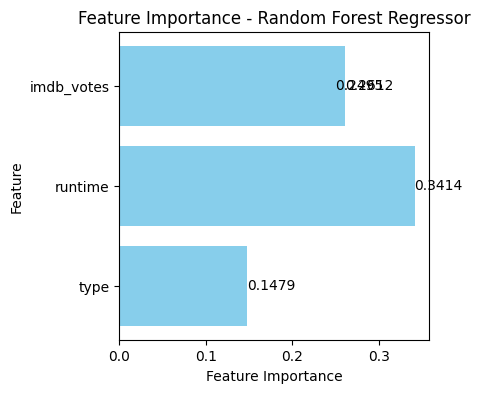

In [ ]:
import matplotlib.pyplot as plt

# Misalkan Anda sudah memiliki feature_importances dari model Random Forest
feature_importances = rfg_sfs_back.feature_importances_
feature_names = best_features  # Misalkan best_features adalah list nama fitur terpilih

# Plotting
plt.figure(figsize=(4, 4))
bars = plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest Regressor')
plt.gca().invert_yaxis()  # Membalik urutan fitur agar yang paling penting di bagian atas

# Menambahkan label nilai pada setiap bar
for bar, importance in zip(bars, feature_importances):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.4f}',
             va='center', ha='left', fontsize=10, color='black')

plt.show()


### Koefisiensi dan feature importance resampled data

In [ ]:
# coefficients = model.coef_
# feature_names = X.columns

# for feature_name, coefficient in zip(feature_names, coefficients):
#     print(f"{feature_name}: {coefficient:.4f}")

In [ ]:
# plt.figure(figsize=(6, 3))
# plt.barh(feature_names, coefficients)
# plt.xlabel("Fitur")
# plt.ylabel("Koefisien")
# plt.title("Diagram Batang Koefisien Regresi")

# plt.yticks(rotation=45, ha="right")

# # Display the plot
# plt.tight_layout()
# plt.show()

In [ ]:
# feature_importances = rfg.feature_importances_

# # Print feature names dan importance
# for feature, importance in zip(X.columns, feature_importances):
#   print(f"{feature}: {importance:.4f}")

In [ ]:
# plt.figure(figsize=(10, 6))
# bars = plt.barh(feature_names, feature_importances, color='skyblue')
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('Random Forest Regresor')
# plt.gca().invert_yaxis()  # Membalik urutan fitur agar yang paling penting di bagian atas

# # Menambahkan label nilai pada setiap bar
# for bar, importance in zip(bars, feature_importances):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.4f}',
#              va='center', ha='left', fontsize=10, color='black')

# plt.show()


In [ ]:
# feature_importances_xgbr = xgbr.feature_importances_

# for feature, importance in zip(X.columns, feature_importances_xgbr):
#   print(f"{feature}: {importance:.4f}")

In [ ]:
# plt.figure(figsize=(10, 6))
# bars = plt.barh(feature_names, feature_importances_xgbr, color='skyblue')
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importances (XGBoost Regressor)')
# plt.gca().invert_yaxis()  # Membalik urutan fitur agar yang paling penting di bagian atas

# # Menambahkan label nilai pada setiap bar
# for bar, importance in zip(bars, feature_importances_xgbr):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.4f}',
#              va='center', ha='left', fontsize=10, color='black')

# plt.show()

In [ ]:
# coefficients = svr.coef_[0]
# importance = np.mean(np.abs(coefficients))

# for feature, coef in zip(X.columns, coefficients):
#     print(f"{feature}: {np.abs(coef):.4f}")


In [ ]:
# plt.figure(figsize=(10, 6))
# bars = plt.barh(feature_names, np.abs(coefficients), color='skyblue')
# plt.xlabel('Coefficient')
# plt.ylabel('Feature')
# plt.title('Feature Coefficients (SVR)')
# plt.gca().invert_yaxis()  # Membalik urutan fitur agar yang paling penting di bagian atas

# # Menambahkan label nilai pada setiap bar
# for bar, coef in zip(bars, coefficients):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{np.abs(coef):.4f}',
#              va='center', ha='left', fontsize=10, color='black')

# plt.show()